# Task-5 : Explore Business Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Checking NULL values

In [223]:
np.where(pd.isna(df))

(array([], dtype=int64), array([], dtype=int64))

## Dropping Duplicates

In [204]:
print("Duplucate Rows=",df.duplicated().astype(int).sum())
df = df.drop_duplicates()
df

Duplucate Rows= 17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Category vise Profits & Sales

<class 'matplotlib.axes._subplots.AxesSubplot'>


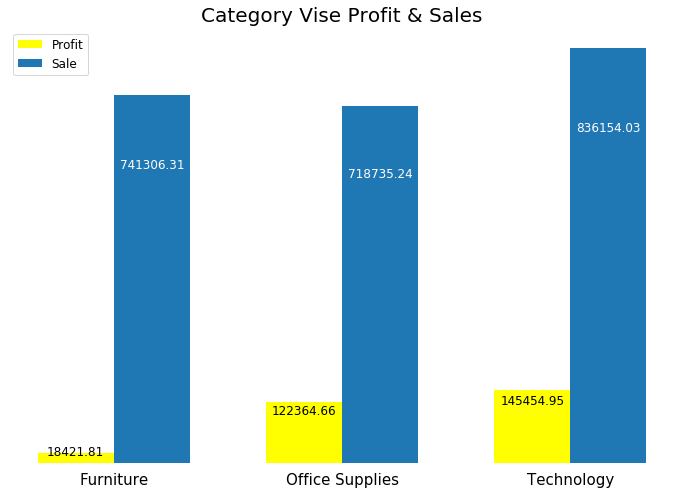

In [39]:
category = df.groupby(by='Category').agg('sum').reset_index()
category
net_profit = category['Profit']
sales = category['Sales']
x = np.array(range(0,9,3))

fig1 = plt.figure(figsize=(12,8))
plt.title("Category Vise Profit & Sales",fontsize=20)
bars = plt.bar(x-0.5,net_profit,width=1,color='yellow',label='Profit')
bars2 = plt.bar(x+0.5,category['Sales'],width=1,label='Sale')

ax = plt.gca().axes
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelsize=12)

for bar,bar2,profit,sale,label in zip(bars,bars2,net_profit,category['Sales'],category['Category'].unique()):
    
    plt.gca().axes.text(bar.get_x()+bar.get_width()/2,profit*0.8,str(round(profit,2)),horizontalalignment='center',color='black',fontsize=12)
    plt.gca().axes.text(bar2.get_x()+bar.get_width()/2,sale*0.8,str(round(sale,2)),horizontalalignment='center',color='white',fontsize=12)
    plt.gca().axes.text(bar2.get_x(),-45000,label,horizontalalignment='center',color='black',fontsize=15)
plt.legend(fontsize=12)
plt.show()   




## Profit & Sales of Each Sub-Categoy
### - We can gain overall idea about sales & profit of Each Sub-Category

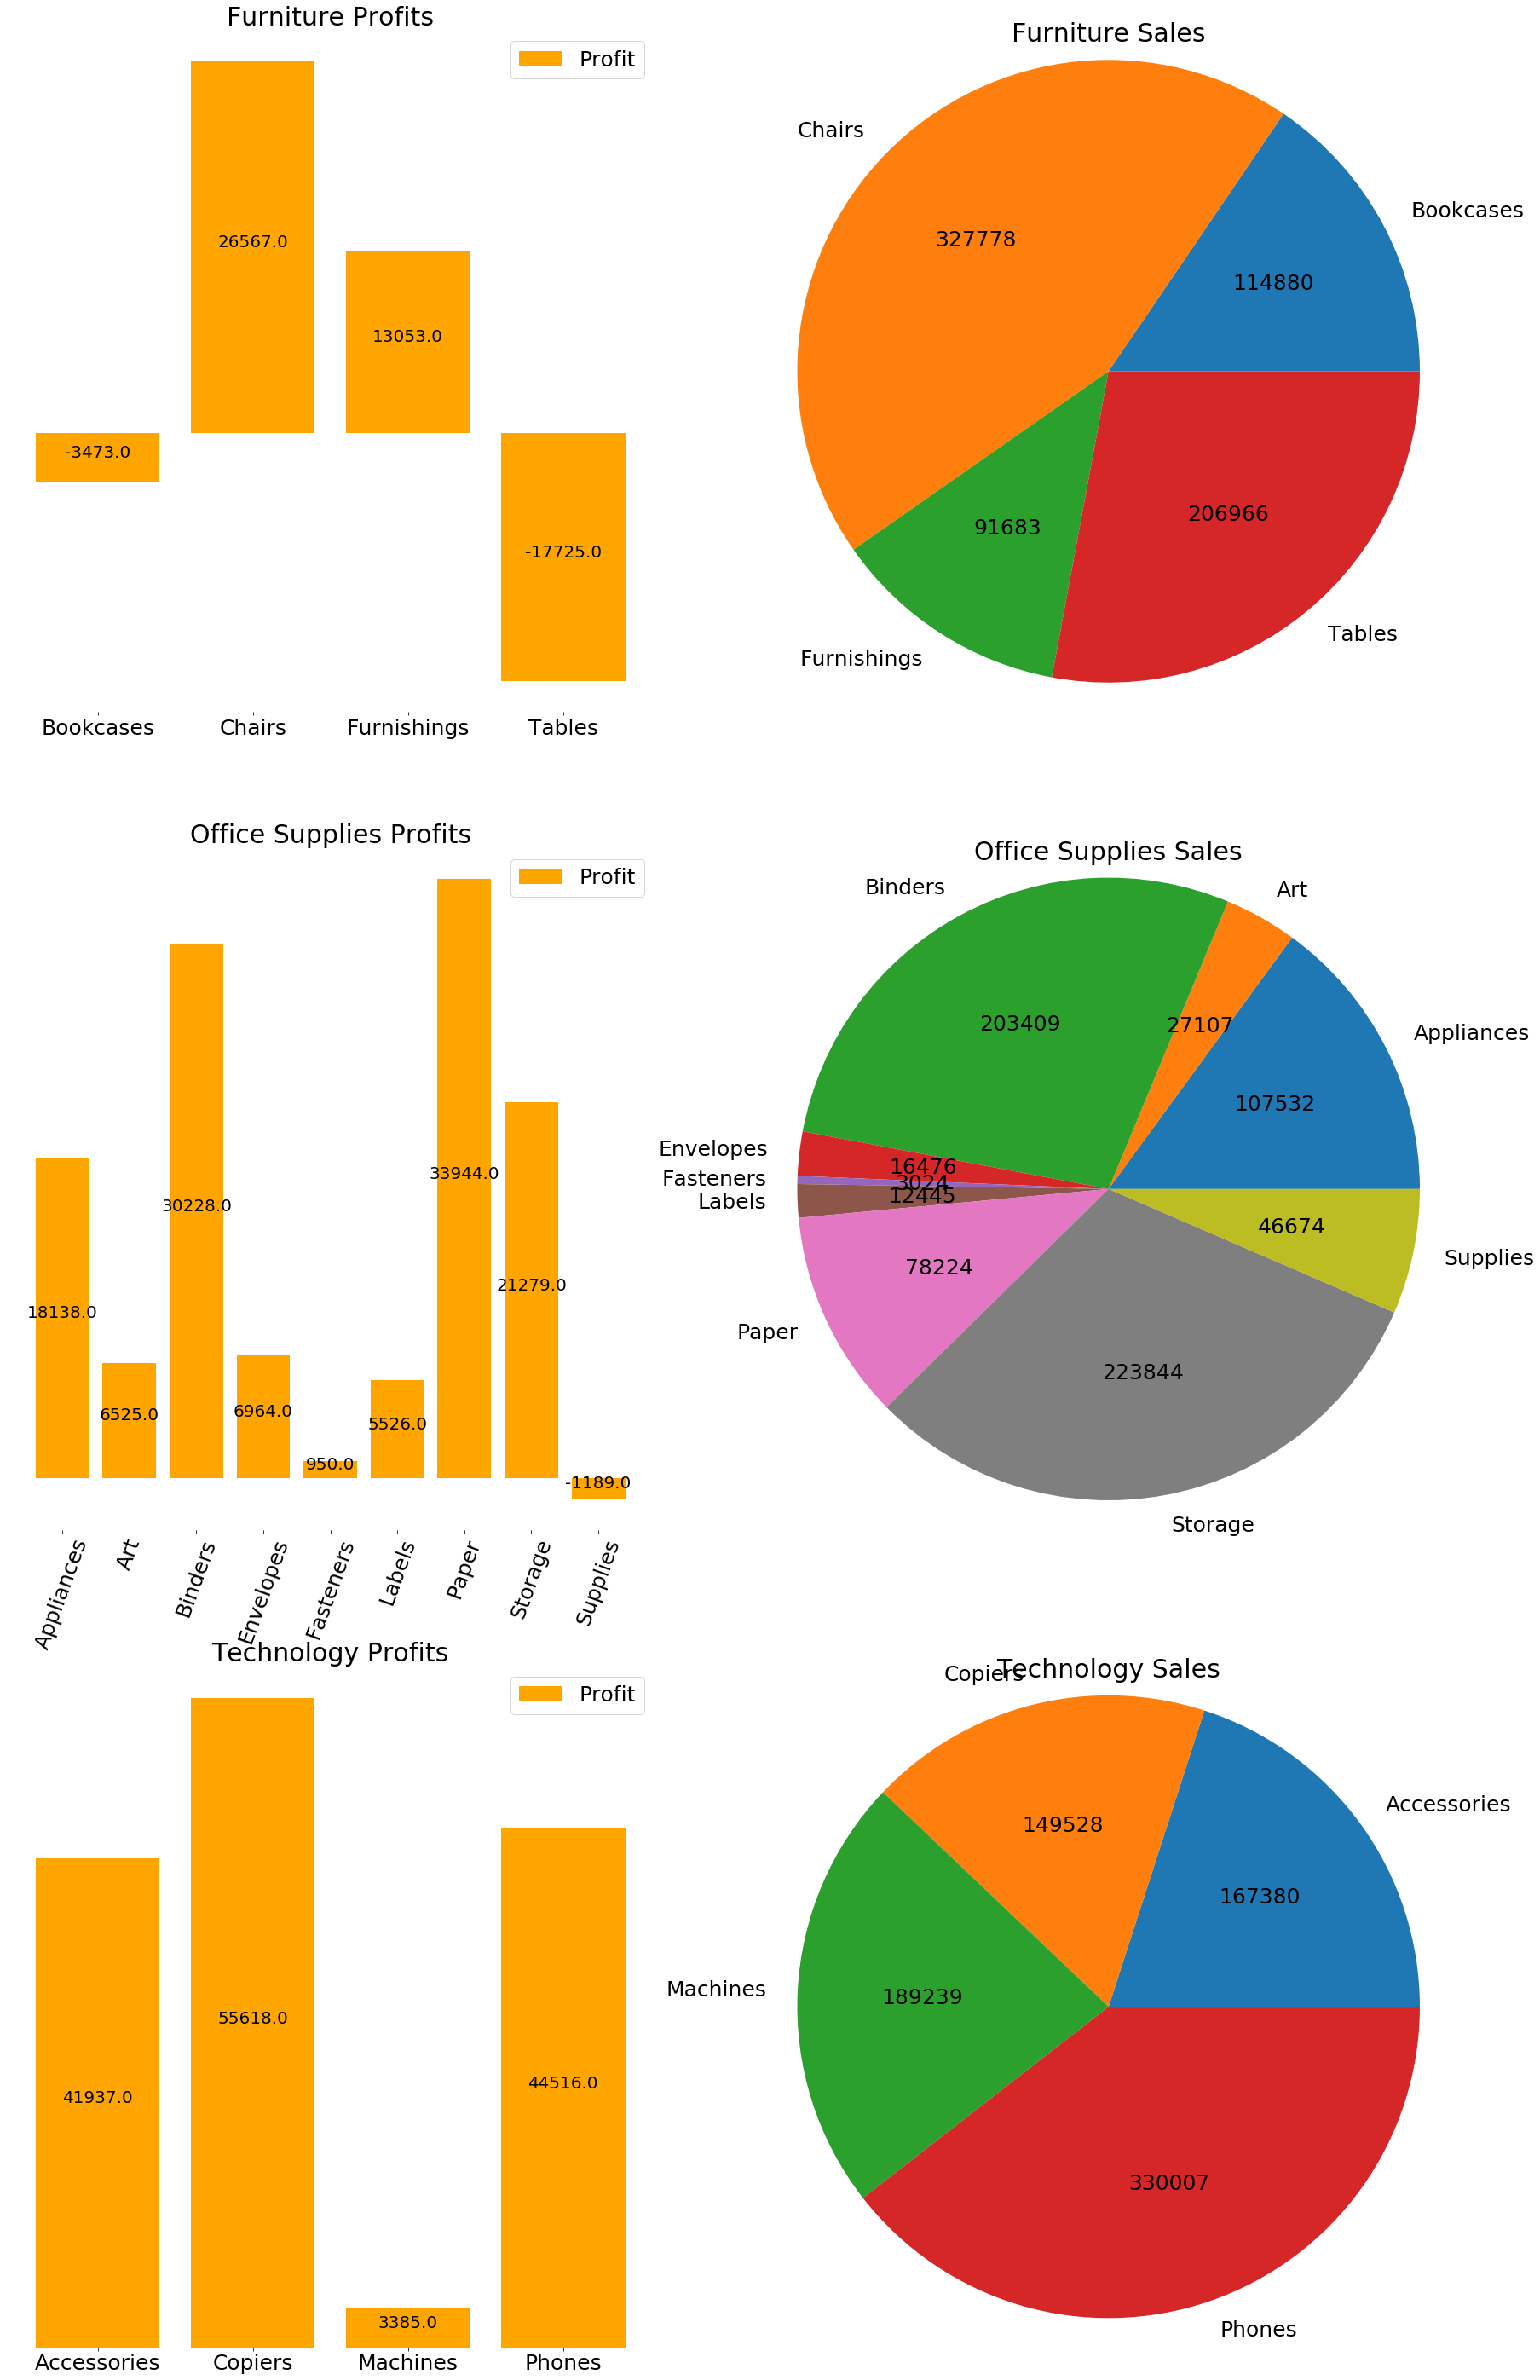

In [8]:
sub_cat = df.groupby(by = ['Category','Sub-Category']).agg(sum).reset_index()
mainCategories = sub_cat['Category'].unique()
fig,axes = plt.subplots(len(mainCategories),2,figsize=(30,50))
#plt.title("Subcategory vise Profit")
for col in range(2):
    for row,cat in zip(range(3),mainCategories):
        ax = axes[row][col]
        if col == 0:
            
            ax.tick_params(labelsize=25)
            ax.set_title(str(cat)+" Profits",fontsize=30)
            ax.get_yaxis().set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            
            temp = sub_cat[sub_cat['Category']==cat]
            netProfit = temp['Profit']
            bars = ax.bar(temp['Sub-Category'],netProfit,color='orange',label='Profit')
            ax.legend(fontsize=25)
            if len(bars) > 5:
                ax.xaxis.set_tick_params(rotation=70)
            for bar,prof in zip(bars,netProfit):
                h = 1 if prof > 0 else -1
                ax.text(bar.get_x()+bar.get_width()/2,prof*0.5,str(round(prof,0)),horizontalalignment='center',color='black',fontsize=20)
        else:
            ax.set_title(str(cat)+' Sales',fontsize=30)
            def value(val):
                s = sub_cat[sub_cat['Category']==cat]['Sales'].sum()
                return int(round(s*val/100,0))
            sales = sub_cat[sub_cat['Category']==cat]['Sales']
            labels = sub_cat[sub_cat['Category']==cat]['Sub-Category']
            ax.pie(sales,labels=labels,autopct=value,radius=1.2,textprops={'fontsize':'25'})
            


## Profit's in Each Region


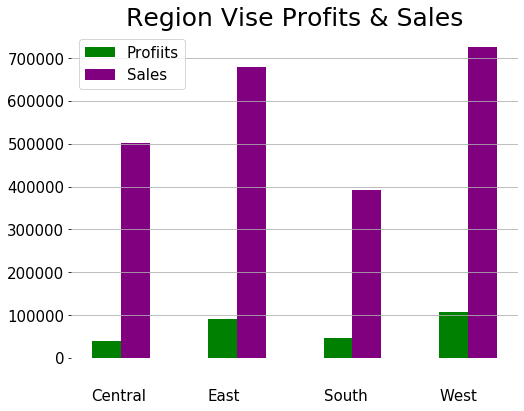

In [224]:
region = df.groupby('Region').agg(sum).reset_index()
labels = region['Region']
values = [region['Profit'] ,region['Sales']]
rg = region['Region']

plt.figure(figsize=(8,6))
plt.title("Region Vise Profits & Sales",fontsize=25)
x = np.array(range(0,8,2))

bars1 = plt.bar(x-0.5,values[0],width=0.5,label='Profiits',color='green')
bars2 = plt.bar(x,values[1],width=0.5,label='Sales',color='purple')
plt.yticks()
ax = plt.gca().axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
for bar1,bar2,txt in zip(bars1,bars2,rg):
    ax.text(bar1.get_x(),-100000,txt,fontsize=15)
plt.yticks(fontsize=15)    
plt.grid(axis='y')
plt.legend(fontsize=15)
plt.show()


## Profit & Sales of all states
### - So we can see those states which have less Sales & Profit

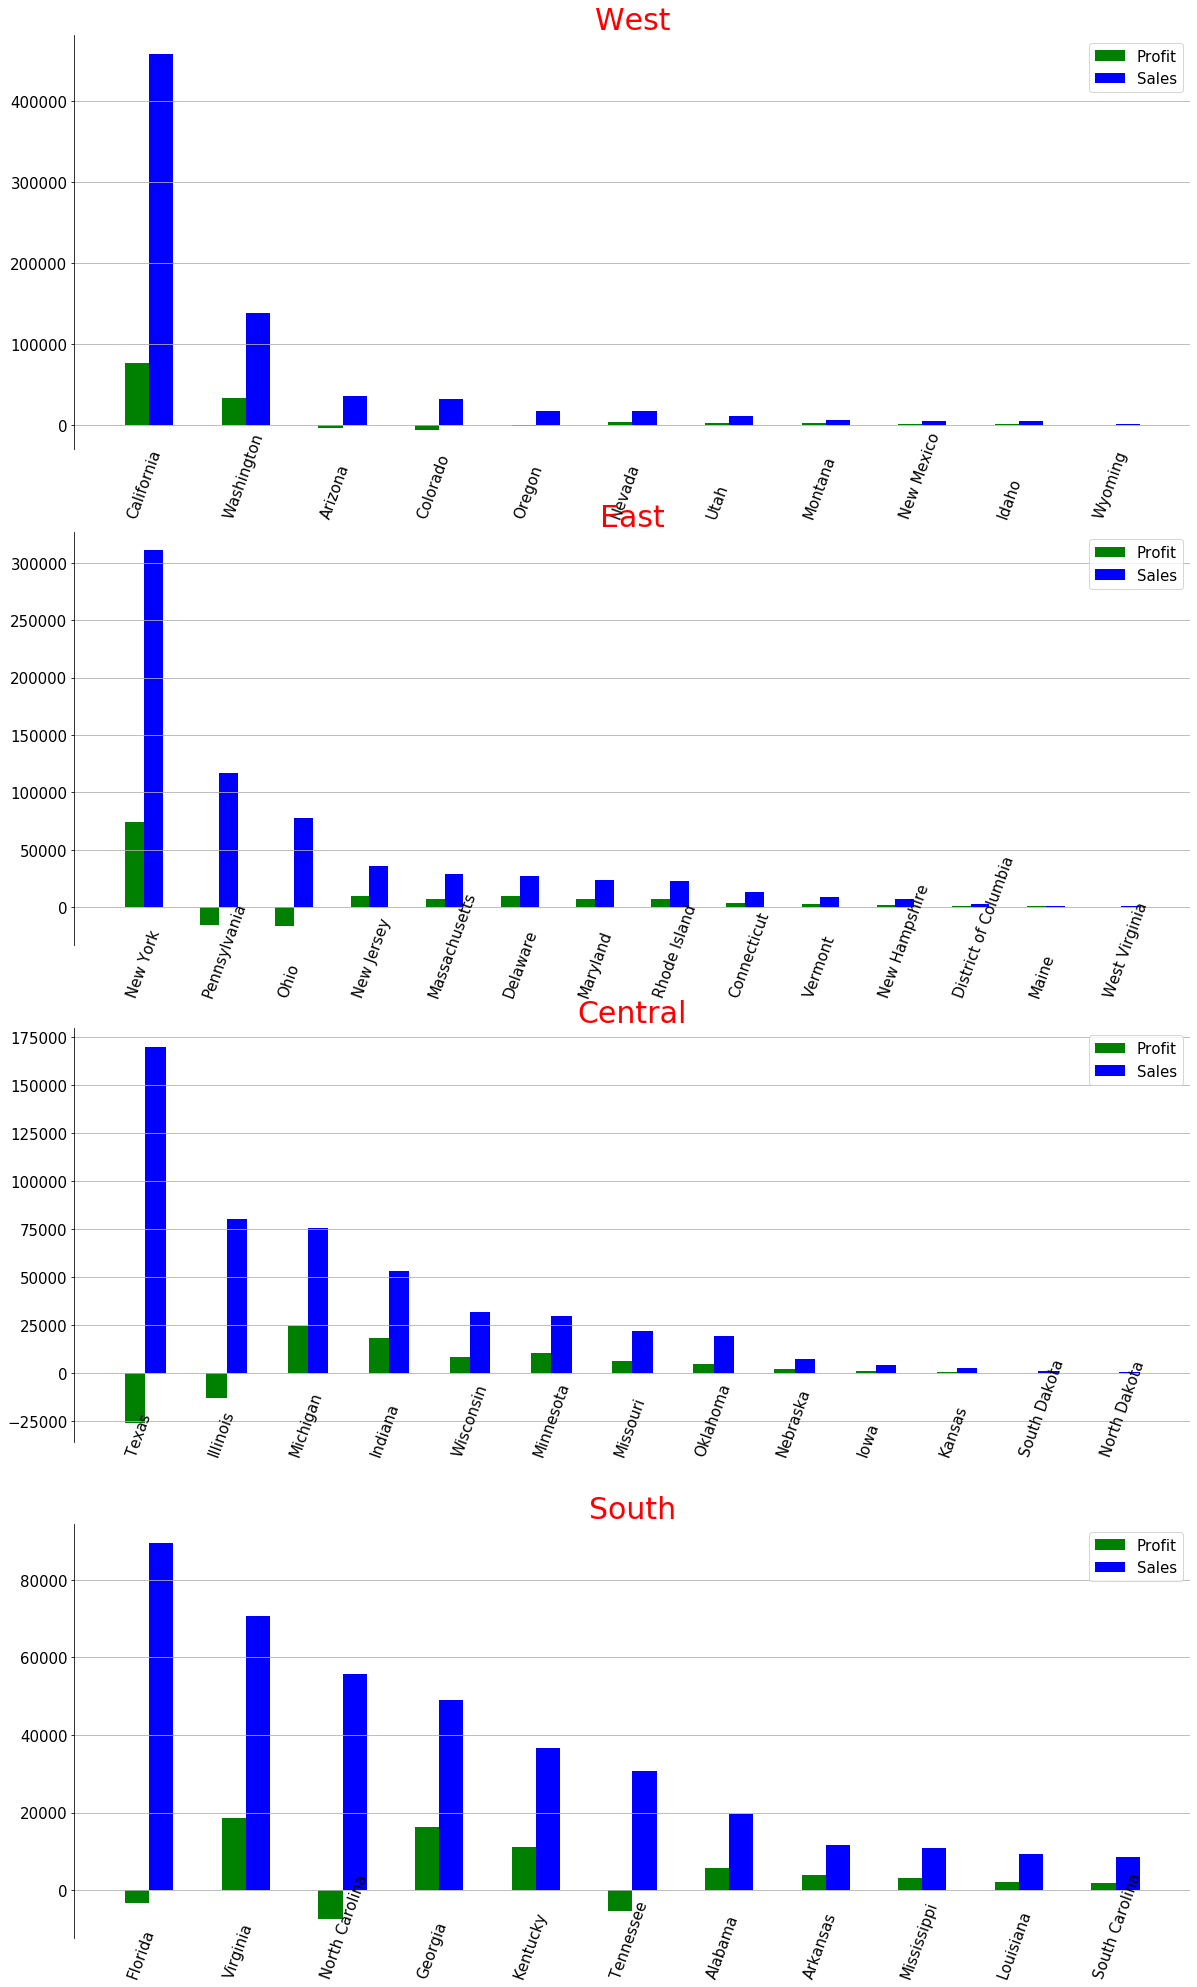

In [215]:
region_state = df.groupby(['Region','State']).agg(sum).reset_index().sort_values(by='Sales',ascending=False)
regions = region_state['Region'].unique()

fig,axes = plt.subplots(4,1,figsize=(20,35))
plt.yticks(fontsize=15)
for ax,rg in zip(axes,regions):
    ax.set_title(str(rg),fontsize=30,color='red')
    temp = region_state[region_state['Region']==rg]
    x = np.array(range(0,2*len(temp),2))
    
    ax.get_xaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    bars1 = ax.bar(x-0.5,temp['Profit'],width=0.5,label='Profit',color='green')
    ax.bar(x,temp['Sales'],width=0.5,label='Sales',color='blue')
    ax.tick_params(labelsize=15)
    states = temp['State']
    y = -1*max(temp['Sales'])/4
    for bar,state in zip(bars1,states):
        ax.text(bar.get_x(),y,state,rotation=70,fontsize=15)
    
    ax.grid()
    ax.legend(fontsize=15) 
      

## Sub-category vise profits percentage of 6 states who have lowest Profit % 
### - So we can identify in particular state which sub-category's profit is less

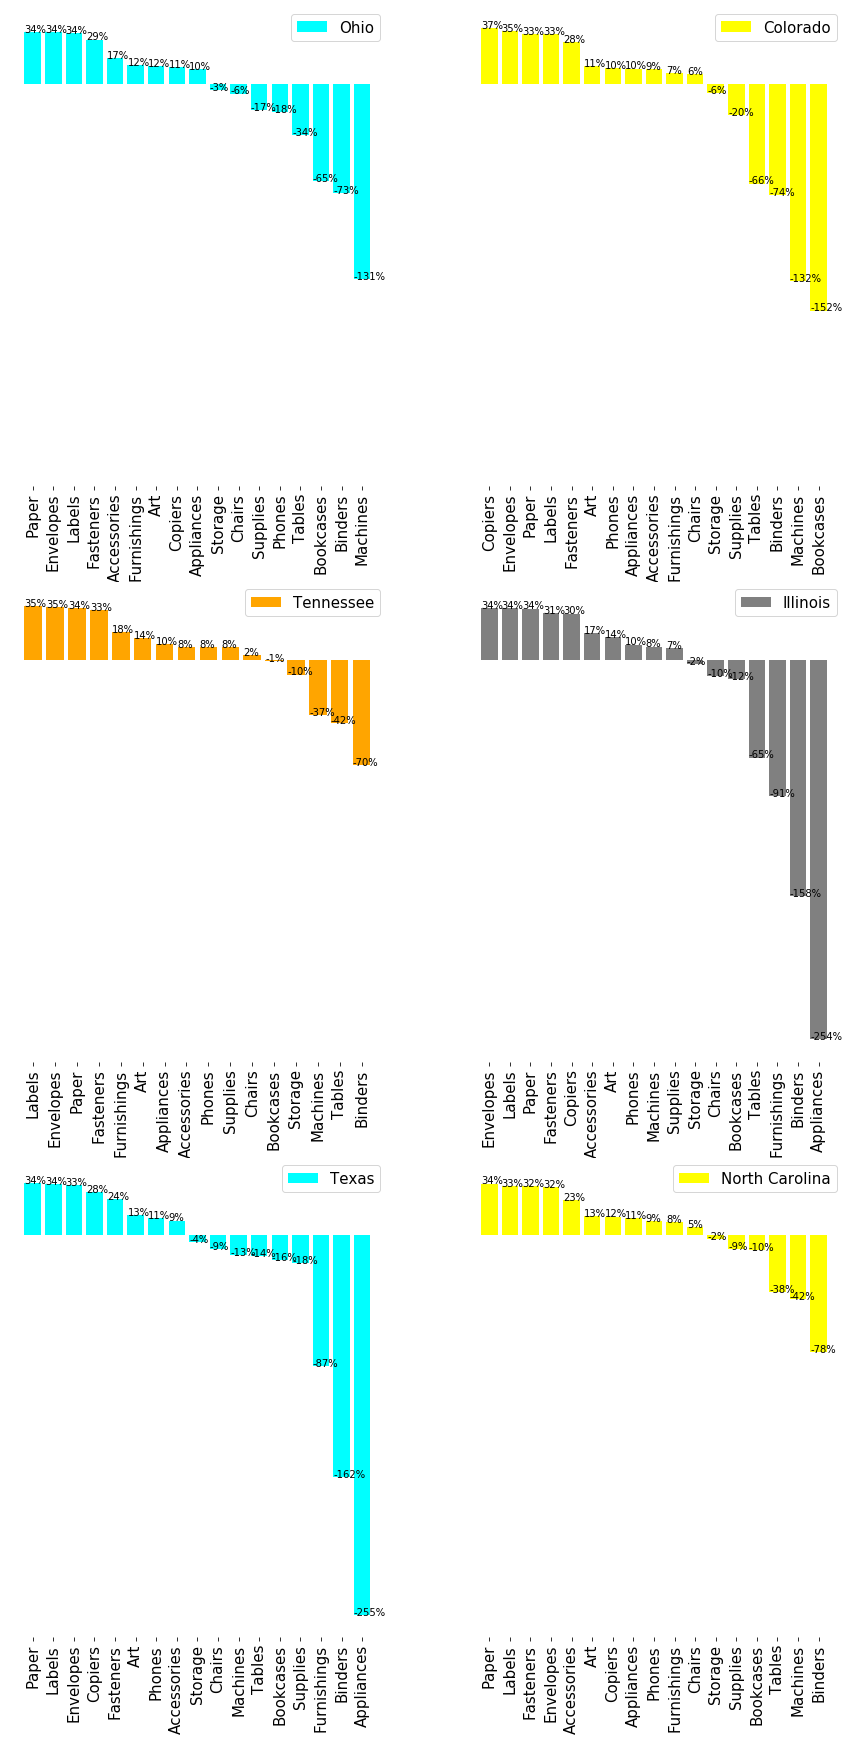

In [222]:
region_state['Proft_Percentage'] = (100*region_state['Profit']/region_state['Sales'])
region_state
weak_states = region_state.sort_values(by='Proft_Percentage')['State'].iloc[:7]
fig,axes = plt.subplots(3,2,figsize=(15,30),sharey=True)
colors=['cyan','yellow','orange','gray','cyan','yellow']
# for ax,st in zip(axes,weak_states):
ind = len(weak_states)//2
for i in range(ind):
    for j in range(2):
        ax = axes[i][j]
        st = weak_states.iloc[i*2+j]
        #ax.set_title("State: "+str(st),fontsize=25)
        temp = df[df['State'] == st].groupby('Sub-Category').agg(sum).reset_index()
        temp['Perc'] = 100*temp['Profit']/temp['Sales']
        temp.sort_values(by='Perc',inplace=True,ascending=False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_ylabel(str(st)+"/'s Profits")
        ax.tick_params(axis="x",labelsize=15,rotation=90)
        bars = ax.bar(temp['Sub-Category'],100*(temp['Profit']/temp['Sales']),color=colors[i*2+j],label=str(st))
        
        #ax.text(0,-20,"Profit",rotation=90,fontsize=10)
        #ax.text(0,min(100*(temp['Profit']/temp['Sales']))/2,str(st),rotation=0,fontsize=25,color='red')
        for bar,profit in zip(bars,100*temp['Profit']/temp['Sales']):
            ax.text(bar.get_x(),profit,str(int(profit))+"%")
        ax.legend(fontsize=15)    
    
    